
# 数据抓取：

> # Requests、Beautifulsoup、Xpath简介
***

王成军

wangchengjun@nju.edu.cn

计算传播网 http://computational-communication.com

In [2]:
# 爬虫基本原理
from IPython.display import display_html, HTML

HTML('<iframe src=http://www.cnblogs.com/zhaof/p/6898138.html \ width=1000 height=500></iframe>')

# 需要解决的问题 

- 页面解析
- 获取Javascript隐藏源数据
- 自动翻页
- 自动登录
- 连接API接口


- 一般的数据抓取，使用requests和beautifulsoup配合就可以了。
- 尤其是对于翻页时url出现规则变化的网页，只需要处理规则化的url就可以了。
- 以简单的例子是抓取天涯论坛上关于某一个关键词的帖子。
    - 在天涯论坛，关于雾霾的帖子的第一页是：
http://bbs.tianya.cn/list.jsp?item=free&nextid=0&order=8&k=雾霾
    - 第二页是：
http://bbs.tianya.cn/list.jsp?item=free&nextid=1&order=8&k=雾霾


# 第一个爬虫

Beautifulsoup Quick Start 

http://www.crummy.com/software/BeautifulSoup/bs4/doc/

![](./img/bs.jpg)

http://computational-class.github.io/bigdata/data/test.html

In [3]:
import requests
from bs4 import BeautifulSoup

In [53]:
help(requests.get) 

Help on function get in module requests.api:

get(url, params=None, **kwargs)
    Sends a GET request.
    
    :param url: URL for the new :class:`Request` object.
    :param params: (optional) Dictionary or bytes to be sent in the query string for the :class:`Request`.
    :param \*\*kwargs: Optional arguments that ``request`` takes.
    :return: :class:`Response <Response>` object
    :rtype: requests.Response



In [5]:
url = 'http://computational-class.github.io/bigdata/data/test.html'
content = requests.get(url)
help(content)

Help on Response in module requests.models object:

class Response(builtins.object)
 |  The :class:`Response <Response>` object, which contains a
 |  server's response to an HTTP request.
 |  
 |  Methods defined here:
 |  
 |  __bool__(self)
 |      Returns True if :attr:`status_code` is less than 400.
 |      
 |      This attribute checks if the status code of the response is between
 |      400 and 600 to see if there was a client error or a server error. If
 |      the status code, is between 200 and 400, this will return True. This
 |      is **not** a check to see if the response code is ``200 OK``.
 |  
 |  __getstate__(self)
 |  
 |  __init__(self)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __iter__(self)
 |      Allows you to use a response as an iterator.
 |  
 |  __nonzero__(self)
 |      Returns True if :attr:`status_code` is less than 400.
 |      
 |      This attribute checks if the status code of the response is between
 |      400 

In [6]:
print(content.text)

<html><head><title>The Dormouse's story</title></head>
<body>
<p class="title"><b>The Dormouse's story</b></p>

<p class="story">Once upon a time there were three little sisters; and their names were
<a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>,
<a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and
<a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>

<p class="story">...</p>


In [7]:
content.encoding

'utf-8'

# Beautiful Soup
> Beautiful Soup is a Python library designed for quick turnaround projects like screen-scraping. Three features make it powerful:

- Beautiful Soup provides a few simple methods. It doesn't take much code to write an application
- Beautiful Soup automatically converts incoming documents to Unicode and outgoing documents to UTF-8. Then you just have to specify the original encoding.
- Beautiful Soup sits on top of popular Python parsers like `lxml` and `html5lib`.


# Install beautifulsoup4

### open your terminal/cmd

<del> $ pip install beautifulsoup4

# html.parser
Beautiful Soup supports the html.parser included in Python’s standard library

# lxml
but it also supports a number of third-party Python parsers. One is the lxml parser `lxml`. Depending on your setup, you might install lxml with one of these commands:

> $ apt-get install python-lxml

> $ easy_install lxml

> $ pip install lxml

# html5lib
Another alternative is the pure-Python html5lib parser `html5lib`, which parses HTML the way a web browser does. Depending on your setup, you might install html5lib with one of these commands:

> $ apt-get install python-html5lib

> $ easy_install html5lib

> $ pip install html5lib

In [9]:
url = 'http://computational-class.github.io/bigdata/data/test.html'
content = requests.get(url)
content = content.text
soup = BeautifulSoup(content, 'html.parser') 
soup

<html><head><title>The Dormouse's story</title></head>
<body>
<p class="title"><b>The Dormouse's story</b></p>
<p class="story">Once upon a time there were three little sisters; and their names were
<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>
<p class="story">...</p></body></html>

In [10]:
print(soup.prettify())

<html>
 <head>
  <title>
   The Dormouse's story
  </title>
 </head>
 <body>
  <p class="title">
   <b>
    The Dormouse's story
   </b>
  </p>
  <p class="story">
   Once upon a time there were three little sisters; and their names were
   <a class="sister" href="http://example.com/elsie" id="link1">
    Elsie
   </a>
   ,
   <a class="sister" href="http://example.com/lacie" id="link2">
    Lacie
   </a>
   and
   <a class="sister" href="http://example.com/tillie" id="link3">
    Tillie
   </a>
   ;
and they lived at the bottom of a well.
  </p>
  <p class="story">
   ...
  </p>
 </body>
</html>


- html
    - head
        - title
    - body
        - p (class = 'title', 'story' )
            - a (class = 'sister')
                - href/id

# Select 方法


- 标签名不加任何修饰
- 类名前加点
- id名前加 #

我们也可以利用这种特性，使用soup.select()方法筛选元素，返回类型是 list

## Select方法三步骤

- Inspect (检查)
- Copy
    - Copy Selector

- 鼠标选中标题`The Dormouse's story`, 右键检查Inspect
- 鼠标移动到选中的源代码
- 右键Copy-->Copy Selector 

`body > p.title > b`


In [14]:
soup.select('body > p.title > b')#[0].text

[<b>The Dormouse's story</b>]

### Select 方法: 通过标签名查找

In [68]:
soup.select('title')

[<title>The Dormouse's story</title>]

In [65]:
soup.select('a')

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>,
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]

In [66]:
soup.select('b')

[<b>The Dormouse's story</b>]

### Select 方法: 通过类名查找

In [69]:
soup.select('.title')

[<p class="title"><b>The Dormouse's story</b></p>]

In [26]:
soup.select('.sister')

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>,
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]

In [27]:
soup.select('.story')

[<p class="story">Once upon a time there were three little sisters; and their names were
 <a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
 and they lived at the bottom of a well.</p>, <p class="story">...</p>]

### Select 方法: 通过id名查找

In [15]:
soup.select('#link1')

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>]

In [16]:
soup.select('#link1')[0]['href']

'http://example.com/elsie'

### Select 方法: 组合查找

将标签名、类名、id名进行组合

- 例如查找 p 标签中，id 等于 link1的内容
 

In [70]:
soup.select('p #link1')

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>]

### Select 方法:属性查找

加入属性元素
- 属性需要用中括号`>`连接
- 属性和标签属于同一节点，中间不能加空格。
 



In [17]:
soup.select("head > title")

[<title>The Dormouse's story</title>]

In [72]:
soup.select("body > p")

[<p class="title"><b>The Dormouse's story</b></p>,
 <p class="story">Once upon a time there were three little sisters; and their names were
 <a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
 and they lived at the bottom of a well.</p>,
 <p class="story">...</p>]

# find_all方法

In [30]:
soup('p')

[<p class="title"><b>The Dormouse's story</b></p>,
 <p class="story">Once upon a time there were three little sisters; and their names were
 <a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
 and they lived at the bottom of a well.</p>,
 <p class="story">...</p>]

In [31]:
soup.find_all('p')

[<p class="title"><b>The Dormouse's story</b></p>,
 <p class="story">Once upon a time there were three little sisters; and their names were
 <a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
 and they lived at the bottom of a well.</p>,
 <p class="story">...</p>]

In [32]:
[i.text for i in soup('p')]

["The Dormouse's story",
 'Once upon a time there were three little sisters; and their names were\nElsie,\nLacie and\nTillie;\nand they lived at the bottom of a well.',
 '...']

In [34]:
for i in soup('p'):
    print(i.text)

The Dormouse's story
Once upon a time there were three little sisters; and their names were
Elsie,
Lacie and
Tillie;
and they lived at the bottom of a well.
...


In [35]:
for tag in soup.find_all(True):
    print(tag.name)

html
head
title
body
p
b
p
a
a
a
p


In [36]:
soup('head') # or soup.head

[<head><title>The Dormouse's story</title></head>]

In [37]:
soup('body') # or soup.body

[<body>
 <p class="title"><b>The Dormouse's story</b></p>
 <p class="story">Once upon a time there were three little sisters; and their names were
 <a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
 and they lived at the bottom of a well.</p>
 <p class="story">...</p></body>]

In [38]:
soup('title')  # or  soup.title

[<title>The Dormouse's story</title>]

In [39]:
soup('p')

[<p class="title"><b>The Dormouse's story</b></p>,
 <p class="story">Once upon a time there were three little sisters; and their names were
 <a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
 and they lived at the bottom of a well.</p>,
 <p class="story">...</p>]

In [40]:
soup.p

<p class="title"><b>The Dormouse's story</b></p>

In [41]:
soup.title.name

'title'

In [42]:
soup.title.string

"The Dormouse's story"

In [43]:
soup.title.text
# 推荐使用text方法

"The Dormouse's story"

In [44]:
soup.title.parent.name

'head'

In [45]:
soup.p

<p class="title"><b>The Dormouse's story</b></p>

In [46]:
soup.p['class']

['title']

In [47]:
soup.find_all('p', {'class', 'title'})

[<p class="title"><b>The Dormouse's story</b></p>]

In [19]:
soup.find_all('p', class_= 'title')

"The Dormouse's story"

In [49]:
soup.find_all('p', {'class', 'story'})

[<p class="story">Once upon a time there were three little sisters; and their names were
 <a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
 and they lived at the bottom of a well.</p>, <p class="story">...</p>]

In [34]:
soup.find_all('p', {'class', 'story'})[0].find_all('a')

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>,
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]

In [51]:
soup.a

<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>

In [52]:
soup('a')

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>,
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]

In [53]:
soup.find(id="link3")

<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>

In [54]:
soup.find_all('a')

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>,
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]

In [55]:
soup.find_all('a', {'class', 'sister'}) # compare with soup.find_all('a')

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>,
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]

In [56]:
soup.find_all('a', {'class', 'sister'})[0]

<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>

In [57]:
soup.find_all('a', {'class', 'sister'})[0].text

'Elsie'

In [58]:
soup.find_all('a', {'class', 'sister'})[0]['href']

'http://example.com/elsie'

In [59]:
soup.find_all('a', {'class', 'sister'})[0]['id']

'link1'

In [71]:
soup.find_all(["a", "b"])

[<b>The Dormouse's story</b>,
 <a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>,
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]

In [38]:
print(soup.get_text())

The Dormouse's story

The Dormouse's story
Once upon a time there were three little sisters; and their names were
Elsie,
Lacie and
Tillie;
and they lived at the bottom of a well.
...


***
***
# 数据抓取：
   > # 抓取微信公众号文章内容
***
***

王成军

wangchengjun@nju.edu.cn

计算传播网 http://computational-communication.com


In [35]:
from IPython.display import display_html, HTML
HTML('<iframe src=http://mp.weixin.qq.com/s?__biz=MzA3MjQ5MTE3OA==&\
mid=206241627&idx=1&sn=471e59c6cf7c8dae452245dbea22c8f3&3rd=MzA3MDU4NTYzMw==&scene=6#rd\
width=800 height=500></iframe>')
# the webpage we would like to crawl

# 查看源代码 Inspect

In [36]:
url = "http://mp.weixin.qq.com/s?__biz=MzA3MjQ5MTE3OA==&mid=206241627&idx=1&sn=471e59c6cf7c8dae452245dbea22c8f3&3rd=MzA3MDU4NTYzMw==&scene=6#rd"
content = requests.get(url).text #获取网页的html文本
soup = BeautifulSoup(content, 'html.parser') 

In [37]:
title = soup.select("#activity-name")
title[0].text.strip()

'南大新传 | 微议题：地震中民族自豪—“中国人先撤”'

In [40]:
soup.find('h2', {'class', 'rich_media_title'}).text.strip()

'南大新传 | 微议题：地震中民族自豪—“中国人先撤”'

In [185]:
print(soup.find('div', {'class', 'rich_media_meta_list'}) )


<div class="rich_media_meta_list" id="meta_content">
<em class="rich_media_meta rich_media_meta_text" id="post-date">2015-05-04</em>
<em class="rich_media_meta rich_media_meta_text">南大新传院</em>
<a class="rich_media_meta rich_media_meta_link rich_media_meta_nickname" href="##" id="post-user">微议题排行榜</a>
<span class="rich_media_meta rich_media_meta_text rich_media_meta_nickname">微议题排行榜</span>
<div class="profile_container" id="js_profile_qrcode" style="display:none;">
<div class="profile_inner">
<strong class="profile_nickname">微议题排行榜</strong>
<img alt="" class="profile_avatar" id="js_profile_qrcode_img" src="">
<p class="profile_meta">
<label class="profile_meta_label">微信号</label>
<span class="profile_meta_value">IssuesRank</span>
</p>
<p class="profile_meta">
<label class="profile_meta_label">功能介绍</label>
<span class="profile_meta_value">感谢关注《微议题排行榜》。我们是南京大学新闻传播学院，计算传播学实验中心，致力于研究社会化媒体时代的公共议程，发布新媒体平台的议题排行榜。</span>
</p>
</img></div>
<span class="profile_arrow_wrp" id="js_profile_arrow_wrp"

In [42]:
soup.find('em').text

'2015-05-04'

In [43]:
article = soup.find('div', {'class' , 'rich_media_content'}).text
print(article)


点击上方“微议题排行榜”可以订阅哦！导读2015年4月25日，尼泊尔发生8.1级地震，造成至少7000多人死亡，中国西藏、印度、孟加拉国、不丹等地均出现人员伤亡。尼泊尔地震后，祖国派出救援机接国人回家，这一“先撤”行为被大量报道，上演了一出霸道总裁不由分说爱国民的新闻。我们对“地震”中人的关注，远远小于国民尊严的保护。通过“撤离”速度来证明中国的影响力也显得有失妥当，灾难应急管理、救援和灾后重建能力才应是“地震”关注焦点。  热词图现 本文以“地震”为关键词，选取了2015年4月10日至4月30日期间微议题TOP100阅读排行进行分析。根据微议题TOP100标题的词频统计，我们可以看出有关“地震”的话题最热词汇的有“尼泊尔”、“油价”、“发改委”。4月25日尼泊尔发生了8级地震，深受人们的关注。面对国外灾难性事件，微媒体的重心却转向“油价”、“发改委”、“祖国先撤”，致力于将世界重大事件与中国政府关联起来。  微议题演化趋势 总文章数总阅读数从4月10日到4月30日，有关“地震”议题出现三个峰值，分别是在4月15日内蒙古地震，20日台湾地震和25日尼泊尔地震。其中对台湾地震与内蒙古地震报道文章较少，而对尼泊尔地震却给予了极大的关注，无论是在文章量还是阅读量上都空前增多。内蒙古、台湾地震由于级数较小，关注少，议程时间也比较短，一般3天后就会淡出公共视野。而尼泊尔地震虽然接近性较差，但规模大，且衍生话题性较强，其讨论热度持续了一周以上。  议题分类 如图，我们将此议题分为6大类。1尼泊尔地震这类文章是对4月25日尼泊尔地震的新闻报道，包括现场视频，地震强度、规模，损失程度、遇难人员介绍等。更进一步的，有对尼泊尔地震原因探析，认为其处在板块交界处，灾难是必然的。因尼泊尔是佛教圣地，也有从佛学角度解释地震的启示。2国内地震报道主要是对10日内蒙古、甘肃、山西等地的地震，以及20日台湾地震的报道。偏重于对硬新闻的呈现，介绍地震范围、级数、伤亡情况，少数几篇是对甘肃地震的辟谣，称其只是微震。3中国救援回应地震救援的报道大多是与尼泊尔地震相关，并且80%的文章是中国政府做出迅速反应派出救援机接国人回家。以“中国人又先撤了”，来为祖国点赞。少数几篇是滴滴快的、腾讯基金、万达等为尼泊尔捐款的消息。4发改委与地震这类文章内容相似，纯粹是对发改委的调侃。称其“预测”地震非常准确，只要一

In [44]:
rmml = soup.find('div', {'class', 'rich_media_meta_list'})
date = rmml.find(id = 'post-date').text
rmc = soup.find('div', {'class', 'rich_media_content'})
content = rmc.get_text()
print(title[0].text.strip())
print(date)
print(content)

南大新传 | 微议题：地震中民族自豪—“中国人先撤”
2015-05-04

点击上方“微议题排行榜”可以订阅哦！导读2015年4月25日，尼泊尔发生8.1级地震，造成至少7000多人死亡，中国西藏、印度、孟加拉国、不丹等地均出现人员伤亡。尼泊尔地震后，祖国派出救援机接国人回家，这一“先撤”行为被大量报道，上演了一出霸道总裁不由分说爱国民的新闻。我们对“地震”中人的关注，远远小于国民尊严的保护。通过“撤离”速度来证明中国的影响力也显得有失妥当，灾难应急管理、救援和灾后重建能力才应是“地震”关注焦点。  热词图现 本文以“地震”为关键词，选取了2015年4月10日至4月30日期间微议题TOP100阅读排行进行分析。根据微议题TOP100标题的词频统计，我们可以看出有关“地震”的话题最热词汇的有“尼泊尔”、“油价”、“发改委”。4月25日尼泊尔发生了8级地震，深受人们的关注。面对国外灾难性事件，微媒体的重心却转向“油价”、“发改委”、“祖国先撤”，致力于将世界重大事件与中国政府关联起来。  微议题演化趋势 总文章数总阅读数从4月10日到4月30日，有关“地震”议题出现三个峰值，分别是在4月15日内蒙古地震，20日台湾地震和25日尼泊尔地震。其中对台湾地震与内蒙古地震报道文章较少，而对尼泊尔地震却给予了极大的关注，无论是在文章量还是阅读量上都空前增多。内蒙古、台湾地震由于级数较小，关注少，议程时间也比较短，一般3天后就会淡出公共视野。而尼泊尔地震虽然接近性较差，但规模大，且衍生话题性较强，其讨论热度持续了一周以上。  议题分类 如图，我们将此议题分为6大类。1尼泊尔地震这类文章是对4月25日尼泊尔地震的新闻报道，包括现场视频，地震强度、规模，损失程度、遇难人员介绍等。更进一步的，有对尼泊尔地震原因探析，认为其处在板块交界处，灾难是必然的。因尼泊尔是佛教圣地，也有从佛学角度解释地震的启示。2国内地震报道主要是对10日内蒙古、甘肃、山西等地的地震，以及20日台湾地震的报道。偏重于对硬新闻的呈现，介绍地震范围、级数、伤亡情况，少数几篇是对甘肃地震的辟谣，称其只是微震。3中国救援回应地震救援的报道大多是与尼泊尔地震相关，并且80%的文章是中国政府做出迅速反应派出救援机接国人回家。以“中国人又先撤了”，来为祖国点赞。少数几篇是滴滴快的、腾讯基金、万达等为尼泊尔捐款的消息。4发改委与

# requests + Xpath方法介绍：以豆瓣电影为例


Xpath 即为 XML 路径语言（XML Path Language），它是一种用来确定 XML 文档中某部分位置的语言。

Xpath 基于 XML 的树状结构，提供在数据结构树中找寻节点的能力。起初 Xpath 的提出的初衷是将其作为一个通用的、介于 Xpointer 与 XSL 间的语法模型。但是Xpath 很快的被开发者采用来当作小型查询语言。



获取元素的Xpath信息并获得文本：
这里的“元素的Xpath信息”是需要我们手动获取的，获取方式为：
- 定位目标元素
- 在网站上依次点击：右键 > 检查
- copy xpath
- xpath + '/text()'

参考：https://mp.weixin.qq.com/s/zx3_eflBCrrfOqFEWjAUJw


In [46]:
import requests
from lxml import etree

url = 'https://movie.douban.com/subject/26611804/'
data = requests.get(url).text
s = etree.HTML(data)  

豆瓣电影的名称对应的的xpath为xpath_title，那么title表达为：

`title = s.xpath('xpath_info/text()')`

其中，xpath_info为：

`//*[@id="content"]/h1/span[1]`


In [47]:
title = s.xpath('//*[@id="content"]/h1/span[1]/text()')[0]
director = s.xpath('//*[@id="info"]/span[1]/span[2]/a/text()')
actors = s.xpath('//*[@id="info"]/span[3]/span[2]/a/text()')
type1 = s.xpath('//*[@id="info"]/span[5]/text()')
type2 = s.xpath('//*[@id="info"]/span[6]/text()')
type3 = s.xpath('//*[@id="info"]/span[7]/text()')
time = s.xpath('//*[@id="info"]/span[11]/text()')
length = s.xpath('//*[@id="info"]/span[13]/text()')
score = s.xpath('//*[@id="interest_sectl"]/div[1]/div[2]/strong/text()')[0]

In [48]:
print(title, director, actors, type1, type2, type3, time, length, score)

三块广告牌 Three Billboards Outside Ebbing, Missouri ['马丁·麦克唐纳'] ['弗兰西斯·麦克多蒙德', '伍迪·哈里森', '山姆·洛克威尔', '艾比·考尼什', '卢卡斯·赫奇斯', '彼特·丁拉基', '约翰·浩克斯', '卡赖伯·兰德里·琼斯', '凯瑟琳·纽顿', '凯瑞·康顿', '泽利科·伊万内克', '萨玛拉·维文', '克拉克·彼得斯', '尼克·西塞', '阿曼达·沃伦', '玛拉雅·瑞沃拉·德鲁 ', '布兰登·萨克斯顿', '迈克尔·艾伦·米利甘'] ['剧情'] ['犯罪'] ['官方网站:'] ['2018-03-02(中国大陆)'] ['2017-12-01(美国)'] 8.7


## Douban API

https://developers.douban.com/wiki/?title=guide

In [51]:
import requests
url = 'https://api.douban.com/v2/movie/26611804'
jsonm = requests.get(url).json()

In [58]:
#jsonm.values()
jsonm.keys(), jsonm['rating']

(dict_keys(['image', 'rating', 'attrs', 'id', 'title', 'mobile_link', 'tags', 'alt', 'author', 'summary', 'alt_title']),
 {'average': '8.7', 'max': 10, 'min': 0, 'numRaters': 252898})

In [84]:
jsonm['alt']

'https://movie.douban.com/movie/26611804'

In [87]:
jsonm['attrs']['director']

['马丁·麦克唐纳 Martin McDonagh']

In [89]:
jsonm['attrs']['movie_type']

['剧情', '犯罪']

In [88]:
jsonm['attrs']['cast']

['弗兰西斯·麦克多蒙德 Frances McDormand',
 '伍迪·哈里森 Woody Harrelson',
 '山姆·洛克威尔 Sam Rockwell',
 '艾比·考尼什 Abbie Cornish',
 '卢卡斯·赫奇斯 Lucas Hedges',
 '彼特·丁克拉奇 Peter Dinklage',
 '约翰·浩克斯 John Hawkes',
 '卡赖伯·兰德里·琼斯 Caleb Landry Jones',
 '凯瑟琳·牛顿 Kathryn Newton',
 '凯瑞·康顿 Kerry Condon',
 '泽利科·伊万内克 Zeljko Ivanek',
 '萨玛拉·维文 Samara Weaving',
 '克拉克·彼得斯 Clarke Peters',
 '尼克·西塞 Nick Searcy',
 '阿曼达·沃伦 Amanda Warren',
 '玛拉雅·瑞沃拉·德鲁  Malaya Rivera Drew',
 '布兰登·萨克斯顿 Brendan Sexton III',
 '迈克尔·艾伦·米利甘 Michael Aaron Milligan']

## 作业：抓取豆瓣电影 Top 250

In [59]:
import requests
from bs4 import BeautifulSoup
from lxml import etree

url0 = 'https://movie.douban.com/top250?start=0&filter='
data = requests.get(url0).text
s = etree.HTML(data)

In [222]:
s.xpath('//*[@id="content"]/div/div[1]/ol/li[1]/div/div[2]/div[1]/a/span[1]/text()')[0]

'肖申克的救赎'

In [225]:
s.xpath('//*[@id="content"]/div/div[1]/ol/li[2]/div/div[2]/div[1]/a/span[1]/text()')[0]

'霸王别姬'

In [227]:
s.xpath('//*[@id="content"]/div/div[1]/ol/li[3]/div/div[2]/div[1]/a/span[1]/text()')[0]

'这个杀手不太冷'

In [60]:
import requests
from bs4 import BeautifulSoup

url0 = 'https://movie.douban.com/top250?start=0&filter='
data = requests.get(url0).text
soup = BeautifulSoup(data, 'lxml')

In [61]:
movies = soup.find_all('div', {'class', 'info'})

In [62]:
len(movies)

25

In [63]:
movies[0].a['href']

'https://movie.douban.com/subject/1292052/'

In [39]:
movies[0].find('span', {'class', 'title'}).text

'肖申克的救赎'

In [26]:
movies[0].find('div', {'class', 'star'})

<div class="star">
<span class="rating5-t"></span>
<span class="rating_num" property="v:average">9.6</span>
<span content="10.0" property="v:best"></span>
<span>1004428人评价</span>
</div>

In [28]:
movies[0].find('span', {'class', 'rating_num'}).text

'9.6'

In [90]:
people_num = movies[0].find('div', {'class', 'star'}).find_all('span')[-1]
people_num.text.split('人评价')[0]

'1004428'

In [64]:
for i in movies:
    url = i.a['href']
    title = i.find('span', {'class', 'title'}).text
    des = i.find('div', {'class', 'star'})
    rating = des.find('span', {'class', 'rating_num'}).text
    rating_num = des.find_all('span')[-1].text.split('人评价')[0]
    print(url, title, rating, rating_num)

https://movie.douban.com/subject/1292052/ 肖申克的救赎 9.6 1021383
https://movie.douban.com/subject/1291546/ 霸王别姬 9.5 742984
https://movie.douban.com/subject/1295644/ 这个杀手不太冷 9.4 957578
https://movie.douban.com/subject/1292720/ 阿甘正传 9.4 814634
https://movie.douban.com/subject/1292063/ 美丽人生 9.5 475813
https://movie.douban.com/subject/1291561/ 千与千寻 9.3 762619
https://movie.douban.com/subject/1292722/ 泰坦尼克号 9.3 754309
https://movie.douban.com/subject/1295124/ 辛德勒的名单 9.4 433191
https://movie.douban.com/subject/3541415/ 盗梦空间 9.3 853620
https://movie.douban.com/subject/2131459/ 机器人总动员 9.3 559729
https://movie.douban.com/subject/1292001/ 海上钢琴师 9.2 657670
https://movie.douban.com/subject/3793023/ 三傻大闹宝莱坞 9.2 767473
https://movie.douban.com/subject/3011091/ 忠犬八公的故事 9.2 529473
https://movie.douban.com/subject/1291549/ 放牛班的春天 9.2 513071
https://movie.douban.com/subject/1292213/ 大话西游之大圣娶亲 9.2 561091
https://movie.douban.com/subject/1292064/ 楚门的世界 9.1 533017
https://movie.douban.com/subject/1291560/ 龙猫 9

In [51]:
for i in range(0, 250, 25):
    print('https://movie.douban.com/top250?start=%d&filter='% i)

https://movie.douban.com/top250?start=0&filter=
https://movie.douban.com/top250?start=25&filter=
https://movie.douban.com/top250?start=50&filter=
https://movie.douban.com/top250?start=75&filter=
https://movie.douban.com/top250?start=100&filter=
https://movie.douban.com/top250?start=125&filter=
https://movie.douban.com/top250?start=150&filter=
https://movie.douban.com/top250?start=175&filter=
https://movie.douban.com/top250?start=200&filter=
https://movie.douban.com/top250?start=225&filter=


In [65]:
import requests
from bs4 import BeautifulSoup
dat = []
for j in range(0, 250, 25):
    urli = 'https://movie.douban.com/top250?start=%d&filter='% j
    data = requests.get(urli).text
    soup = BeautifulSoup(data, 'lxml')
    movies = soup.find_all('div', {'class', 'info'})
    for i in movies:
        url = i.a['href']
        title = i.find('span', {'class', 'title'}).text
        des = i.find('div', {'class', 'star'})
        rating = des.find('span', {'class', 'rating_num'}).text
        rating_num = des.find_all('span')[-1].text.split('人评价')[0]
        listi = [url, title, rating, rating_num]
        dat.append(listi)

In [66]:
import pandas as pd
df = pd.DataFrame(dat, columns = ['url', 'title', 'rating', 'rating_num'])
df['rating'] = df.rating.astype(float)
df['rating_num'] = df.rating_num.astype(int)
df.head()

,url,title,rating,rating_num
0,https://movie.douban.com/subject/1292052/,肖申克的救赎,9.6,1021383
1,https://movie.douban.com/subject/1291546/,霸王别姬,9.5,742984
2,https://movie.douban.com/subject/1295644/,这个杀手不太冷,9.4,957578
3,https://movie.douban.com/subject/1292720/,阿甘正传,9.4,814634
4,https://movie.douban.com/subject/1292063/,美丽人生,9.5,475813


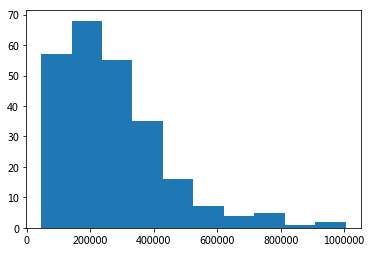

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(df.rating_num)
plt.show()

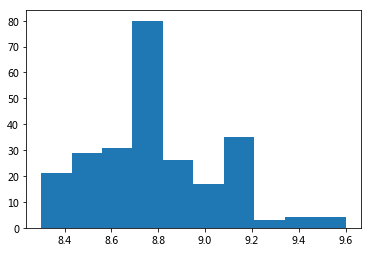

In [19]:
plt.hist(df.rating)
plt.show()

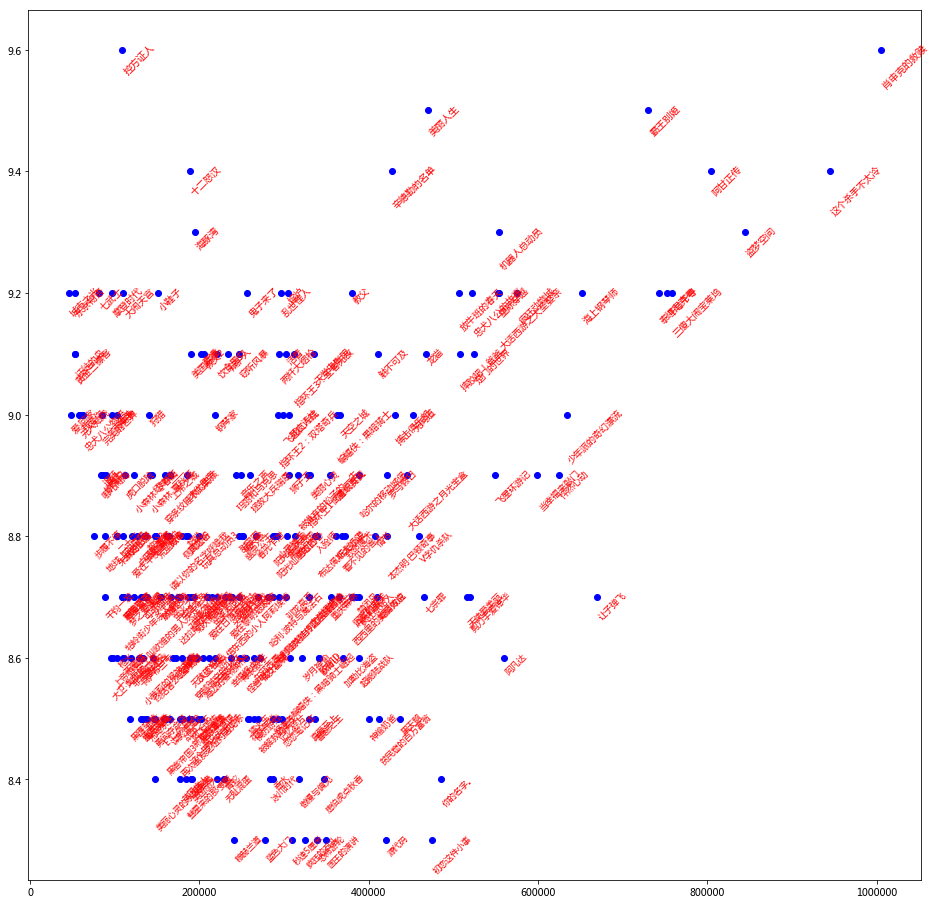

In [11]:
fig = plt.figure(figsize=(16, 16),facecolor='white')

plt.plot(df.rating_num, df.rating, 'bo')
for i in df.index:
    plt.text(df.rating_num[i], df.rating[i], df.title[i], 
             fontsize = df.rating[i], 
             color = 'red', rotation = 45)
plt.show() 

In [123]:
df[df.rating > 9.4]

,url,title,rating,rating_num
0,https://movie.douban.com/subject/1292052/,肖申克的救赎,9.6,1004428
1,https://movie.douban.com/subject/1291546/,霸王别姬,9.5,730274
4,https://movie.douban.com/subject/1292063/,美丽人生,9.5,469332
41,https://movie.douban.com/subject/1296141/,控方证人,9.6,108598


In [69]:
alist = []
for i in df.index:
    alist.append( [df.rating_num[i], df.rating[i], df.title[i] ])

blist =[[df.rating_num[i], df.rating[i], df.title[i] ] for i in df.index] 

alist

[[1021383, 9.5999999999999996, '肖申克的救赎'],
 [742984, 9.5, '霸王别姬'],
 [957578, 9.4000000000000004, '这个杀手不太冷'],
 [814634, 9.4000000000000004, '阿甘正传'],
 [475813, 9.5, '美丽人生'],
 [762619, 9.3000000000000007, '千与千寻'],
 [754309, 9.3000000000000007, '泰坦尼克号'],
 [433191, 9.4000000000000004, '辛德勒的名单'],
 [853620, 9.3000000000000007, '盗梦空间'],
 [559729, 9.3000000000000007, '机器人总动员'],
 [657670, 9.1999999999999993, '海上钢琴师'],
 [767473, 9.1999999999999993, '三傻大闹宝莱坞'],
 [529473, 9.1999999999999993, '忠犬八公的故事'],
 [513071, 9.1999999999999993, '放牛班的春天'],
 [561091, 9.1999999999999993, '大话西游之大圣娶亲'],
 [533017, 9.0999999999999996, '楚门的世界'],
 [473631, 9.0999999999999996, '龙猫'],
 [385130, 9.1999999999999993, '教父'],
 [309138, 9.1999999999999993, '熔炉'],
 [560855, 9.1999999999999993, '星际穿越'],
 [299301, 9.1999999999999993, '乱世佳人'],
 [416073, 9.0999999999999996, '触不可及'],
 [458107, 9.0, '无间道'],
 [606767, 8.9000000000000004, '当幸福来敲门'],
 [337952, 9.0999999999999996, '天堂电影院'],
 [633995, 8.9000000000000004, '怦然心动'],
 [190977,

In [70]:
    
from IPython.display import display_html, HTML
HTML('<iframe src=http://nbviewer.jupyter.org/github/computational-class/bigdata/blob/gh-pages/vis/douban250bubble.html \
     width=1000 height=500></iframe>')

# 作业：

- 抓取复旦新媒体微信公众号最新一期的内容
